In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pandas as pd

# Define the path to your dataset
file_path = "Liver Patient Dataset (LPD)_train.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, encoding='unicode_escape')

# Display basic information
print(df.head())  # Print the first 5 rows
print(df.info())  # Show dataset structure

   Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3         

In [3]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (30691, 11)


In [5]:
print("\nColumns: ", df.columns)


Columns:  Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [7]:
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})
df['Result'] = df['Result'].map({1: 1, 2: 0})

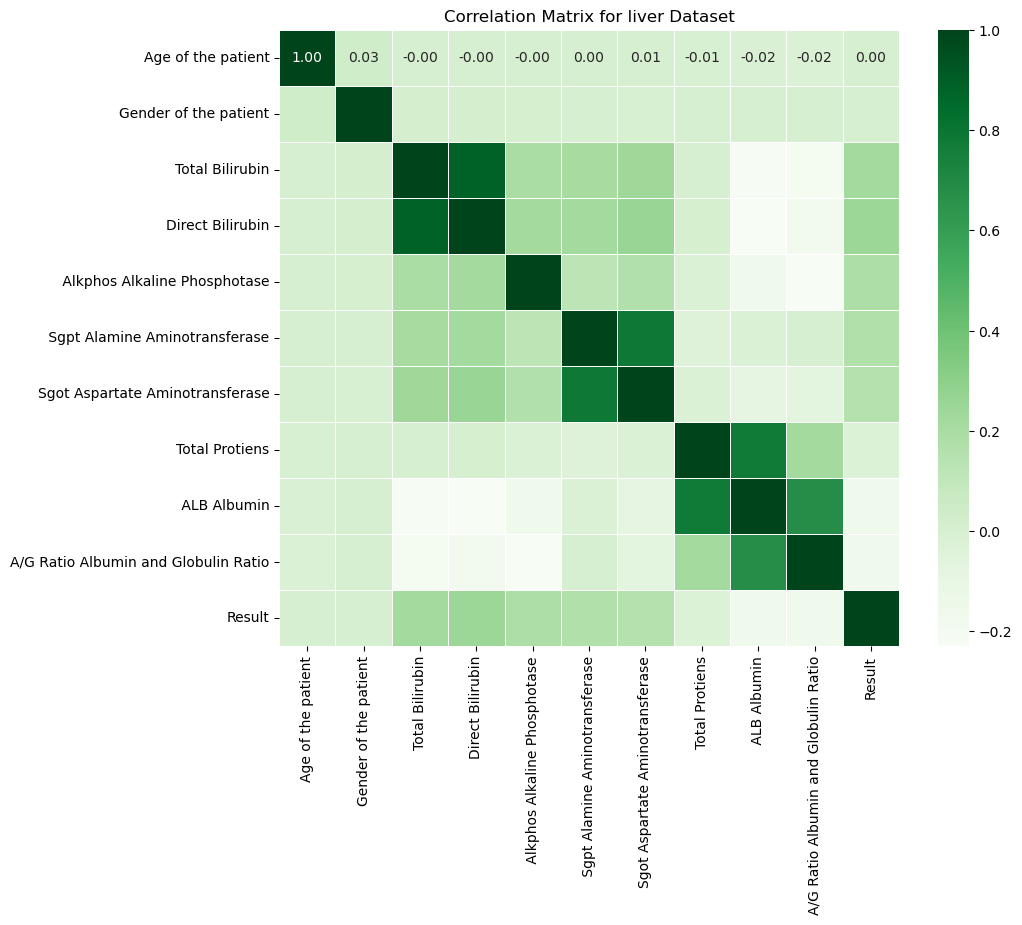

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for liver Dataset")
plt.show()

In [9]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True) #numerical columns with mean
df["Gender of the patient"] = df["Gender of the patient"].fillna(df["Gender of the patient"].mode()[0])  #categorical with mode

In [11]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [12]:
x = df.drop('Result', axis=1)
y = df['Result'] - 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #75:25

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [14]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(num_leaves=15, learning_rate=0.03, reg_alpha=0.5, reg_lambda=0.5)
lgbm_model.fit(X_train_scaled, y_train)
lgbm_predictions = lgbm_model.predict(X_test_scaled)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("LightGBM Accuracy:", lgbm_accuracy)

[LightGBM] [Info] Number of positive: 16383, number of negative: 6635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 23018, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.711747 -> initscore=0.903886
[LightGBM] [Info] Start training from score 0.903886
LightGBM Accuracy: 0.9104652678222338


In [15]:
y_test_pred = lgbm_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9104652678222338


In [16]:
from sklearn.metrics import accuracy_score

# Compute predictions for both train and validation sets
train_predictions = lgbm_model.predict(X_train_scaled)
val_predictions = lgbm_model.predict(X_test_scaled)

# Compute accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_test, val_predictions)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Train Accuracy: 0.9068
Validation Accuracy: 0.9105


In [17]:
class_report = classification_report(y_test, lgbm_predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.70      0.81      2139
           0       0.90      0.99      0.94      5534

    accuracy                           0.91      7673
   macro avg       0.93      0.85      0.88      7673
weighted avg       0.92      0.91      0.91      7673



In [18]:
conf_matrix = confusion_matrix(y_test, lgbm_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1500  639]
 [  48 5486]]


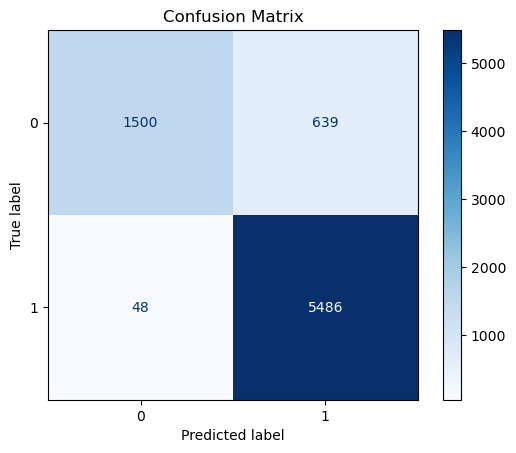

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2139
           0       1.00      1.00      1.00      5534

    accuracy                           1.00      7673
   macro avg       1.00      1.00      1.00      7673
weighted avg       1.00      1.00      1.00      7673



In [19]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lgbm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_test))


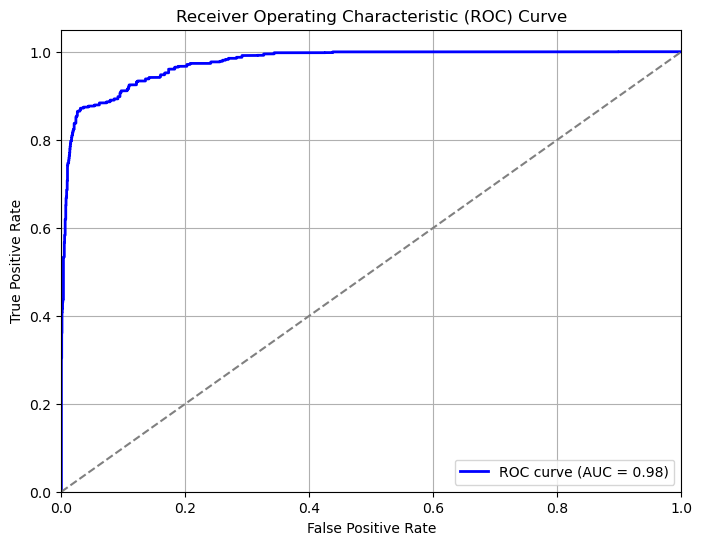

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Import these functions

y_test = (y_test - y_test.min()).astype(int)  # Shift values to 0 and 1

# Get prediction probabilities
y_probs = lgbm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


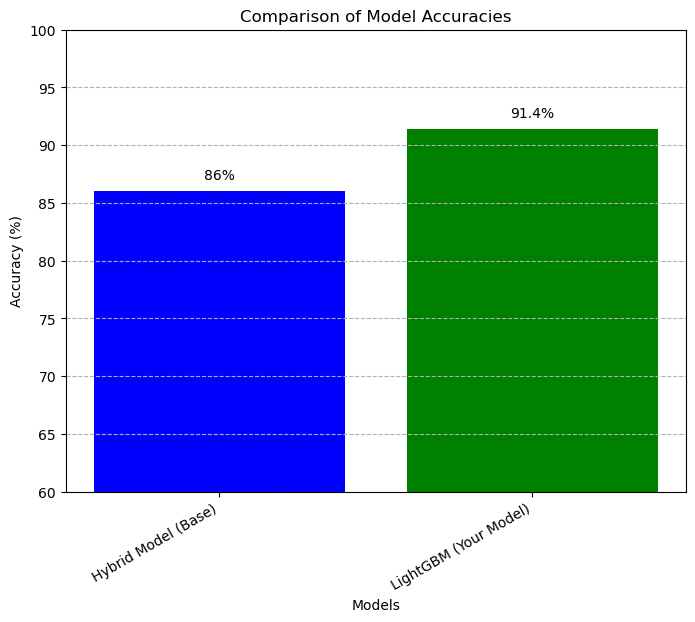

In [21]:
import matplotlib.pyplot as plt

# Model names
models = ['Hybrid Model (Base)', 'LightGBM (Your Model)']

# Accuracy scores
accuracy = [86, 91.4]  # Assuming Decision Tree and Logistic Regression had < RF

# Plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=30, ha='right')
plt.ylim(60, 100)
plt.grid(axis='y', linestyle='--')

# Display values on bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=10)

plt.show()
